In [1]:
import cv2

In [2]:
# initialize cascade classifier
numberPlate_cascade = "numberplate_haarcade.xml"
detector = cv2.CascadeClassifier(numberPlate_cascade)

In [3]:
# read image
img = cv2.imread('image.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#-- Detect Number plates
plates = detector.detectMultiScale(
      img_gray,scaleFactor=1.05, minNeighbors=7,
      minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
print(plates)

[[ 47  51 216  72]]


In [5]:
# iterate through each detected number plates
for (x,y,w,h) in plates:
    
    # draw bounding box0
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Crop the numberplate
    plateROI = img_gray[y:y+h,x:x+w]
    #cv2.imshow("Numberplate", plateROI)
    
# Show the final output
#cv2.imshow('Output', img)

# wait until  any key is pressed
#cv2.waitKey(0)

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
path=plt.imsave('test1.jpg', plateROI)

In [8]:
import pandas
import seaborn

In [9]:
def plot_(image) :
    plt.figure(figsize = (10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(image, 'gray')
    
    plt.axis('off')

In [10]:
img1 = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)

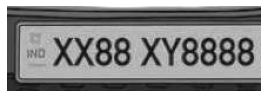

In [11]:
plot_(img1)

In [12]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

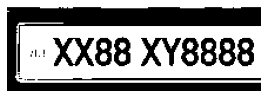

In [13]:
plot_(thresh_img1)

In [14]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

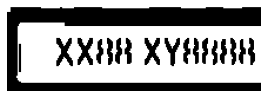

In [15]:
plot_(close_img1)

In [16]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)

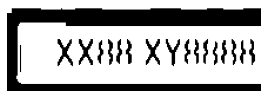

In [17]:
plot_(dilate_img1)

In [18]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)

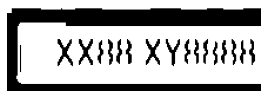

In [19]:
plot_(gauss_img1)

In [20]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)
cv2.rectangle(gauss_img1, (130,12), (150,49), 0, 1)
cv2.rectangle(gauss_img1, (150,12), (170,49), 0, 1)
cv2.rectangle(gauss_img1, (170,12), (190,49), 0, 1)
cv2.rectangle(gauss_img1, (190,12), (210,49),0, 1)
cv2.rectangle(gauss_img1, (210,12),(230,49),0, 1)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

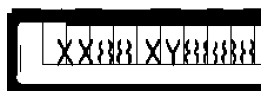

In [21]:
plot_(gauss_img1)

In [22]:
path="data"

In [23]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [24]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator

In [25]:
X = []
y = []

for image in os.listdir(path) :
    
    if image[2:] != 'JPG' :
        continue
    
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    
    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)


TypeError: float() argument must be a string or a number, not 'Image'

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X /= 255.0

In [ ]:
plt.figure(figsize = (20,5))
for i in range(6) :
    plt.subplot(1,6,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()


In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

In [ ]:
temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [ ]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))